In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
us_history = pd.read_csv('../data/United States  1971-01-01 to 1991-01-01.csv')

In [5]:
us_history.shape

(7306, 33)

In [6]:
us_current = pd.read_csv('../data/United States 1991-02-01 to 2020-01-01.csv')

In [7]:
us_current.shape

(10562, 33)

In [8]:
df = pd.concat([us_current, us_history])
df.shape

(17868, 33)

In [9]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [10]:
df.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex             float64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [11]:
df.isnull().sum()[lambda x: x > 0]

preciptype        10203
snow              17868
snowdepth         15486
windgust          14893
solarradiation    14214
solarenergy       14214
uvindex           14214
severerisk        17868
dtype: int64

## Investigate 'snow' and 'snowdepth' for data imputing after first model

In [12]:
df['preciptype'].value_counts()

preciptype
rain         6797
rain,snow     701
snow          167
Name: count, dtype: int64

In [13]:
df.groupby(by = 'preciptype', dropna = False)['precip'].value_counts()

preciptype  precip
rain        0.001       554
            0.002       199
            0.003       161
            0.011       153
            0.004       116
                      ...  
snow        0.043         1
            0.025         1
            0.030         1
            0.028         1
NaN         0.000     10203
Name: count, Length: 1753, dtype: int64

#### As we can see, every missing value in 'perciptype' has a precipitation of 0.0. We will identify these as 'neither', as in neither rain or snow. 

In [14]:
df['preciptype'].fillna('neither', inplace=True)

In [15]:
df['preciptype'].value_counts()

preciptype
neither      10203
rain          6797
rain,snow      701
snow           167
Name: count, dtype: int64

In [16]:
len(df) / 5

3573.6

In [17]:
df['preciptype'].unique()

array(['neither', 'rain', 'rain,snow', 'snow'], dtype=object)

## Removing Columns with more than half missing values
- The data dictionary for this dataset mentions that all missing values cannot be replaced with 0's because 0 is a measurement that is used often in this dataset
- Besides 'perciptype' all other columns that have a majority of missing data are floats or integers, making filling those values dangerous to do. 

In [18]:
col_drop = [i for i in df.columns if df[i].isnull().sum() > (len(df) / 5)]

In [19]:
col_drop

['snow',
 'snowdepth',
 'windgust',
 'solarradiation',
 'solarenergy',
 'uvindex',
 'severerisk']

In [20]:
df.drop(columns = col_drop, inplace = True)

In [21]:
df.isnull().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

## Convert and index Date Column 

In [22]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [23]:
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
1971-01-01,United States,33.6,25.6,30.2,25.0,15.1,19.6,22.8,73.8,0.460,...,1007.2,69.6,4.6,1971-01-01T07:26:54,1971-01-01T16:56:27,0.15,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with rain or ...,rain,"72403793728,74594013705"
1971-01-02,United States,38.6,21.3,29.9,38.6,14.7,27.2,19.8,66.2,0.000,...,1021.2,64.9,6.8,1971-01-02T07:27:02,1971-01-02T16:57:15,0.19,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72403793728,74594013705"
1971-01-03,United States,38.3,21.3,29.5,38.3,21.3,28.6,22.7,76.3,0.000,...,1026.3,33.7,6.4,1971-01-03T07:27:09,1971-01-03T16:58:06,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72403793728,74594013705"
1971-01-04,United States,41.0,30.6,35.9,41.0,27.2,34.3,33.3,90.1,0.800,...,1018.1,99.7,1.7,1971-01-04T07:27:12,1971-01-04T16:58:58,0.26,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"72403793728,74594013705"
1971-01-05,United States,44.5,34.3,40.3,41.5,27.2,34.7,30.8,69.7,0.306,...,1014.6,97.0,5.1,1971-01-05T07:27:14,1971-01-05T16:59:51,0.29,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"72403793728,74594013705"


In [24]:
df.tail()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2019-12-28,United States,66.6,38.7,50.1,66.6,36.7,49.7,42.5,78.0,0.000,...,1023.4,58.3,8.5,2019-12-28T07:25:55,2019-12-28T16:53:27,0.08,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C8838,KDCA,72405013743,72403793728,F5872,KADW,..."
2019-12-29,United States,52.1,44.8,48.8,52.1,41.2,47.5,47.0,93.6,0.589,...,1019.0,94.2,4.3,2019-12-29T07:26:11,2019-12-29T16:54:10,0.11,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"C8838,KDCA,72405013743,72403793728,F5872,KGAI,..."
2019-12-30,United States,65.9,46.0,54.8,65.9,41.5,53.7,52.7,93.0,0.258,...,1004.6,88.6,7.0,2019-12-30T07:26:25,2019-12-30T16:54:54,0.14,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"C8838,KDCA,72405013743,72403793728,KGAI,KDAA,K..."
2019-12-31,United States,53.9,42.9,47.5,53.9,39.2,45.1,37.0,70.0,0.000,...,1006.7,83.7,8.6,2019-12-31T07:26:37,2019-12-31T16:55:40,0.18,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C8838,KIAD,72403793728,KGAI,KADW,PWDM2,7459401..."
2020-01-01,United States,51.0,36.2,44.2,51.0,32.7,40.5,24.5,46.6,0.000,...,1010.9,41.6,9.9,2020-01-01T07:26:47,2020-01-01T16:56:28,0.21,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"C8838,KDCA,72405013743,72403793728,F5872,KADW,..."


#### We are seeing no specific trends in our dataset so we will not need to convert our data

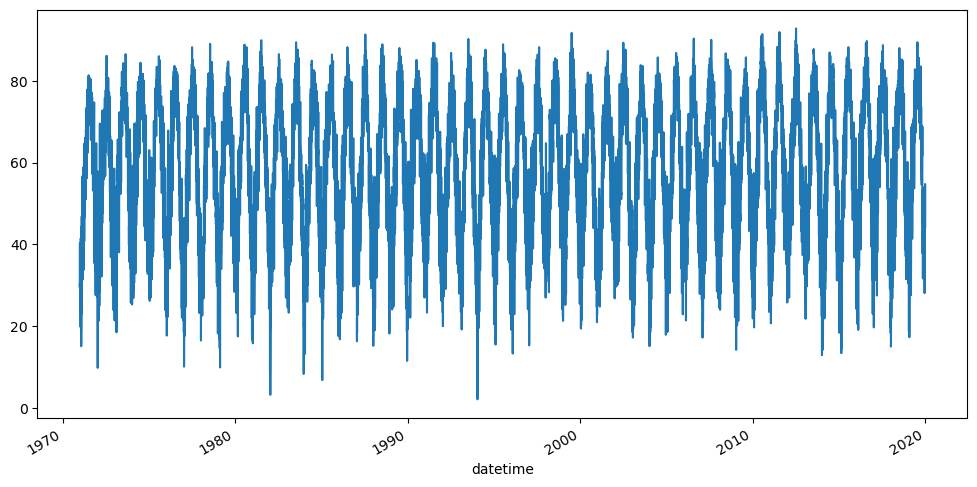

In [25]:
df['temp'].plot(figsize=(12,6));

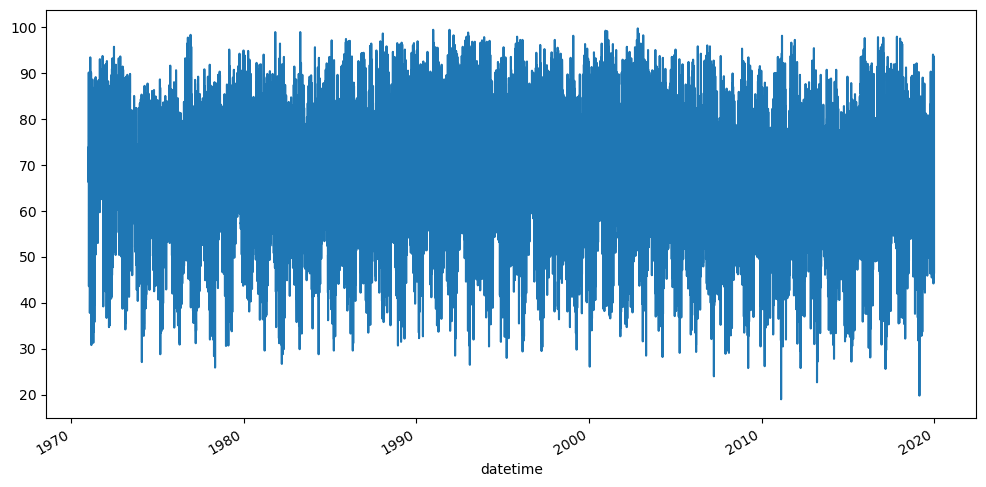

In [26]:
df['humidity'].plot(figsize=(12,6));

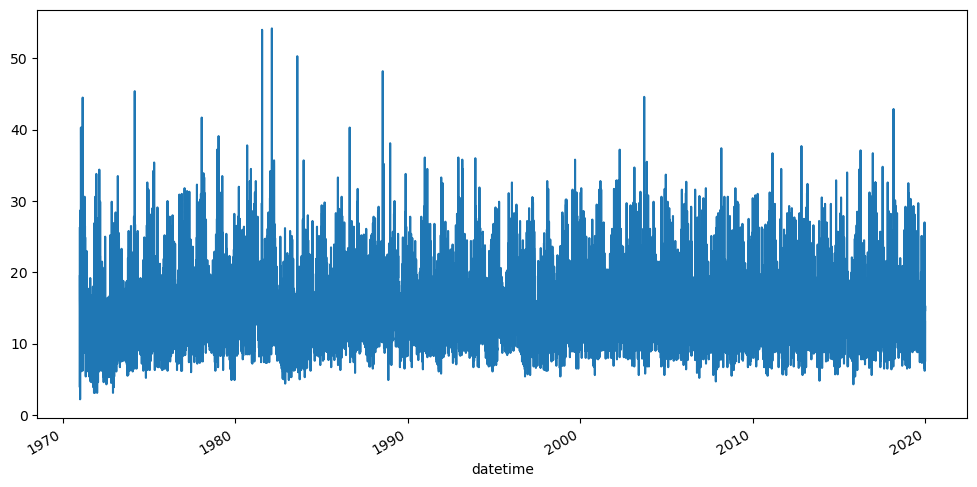

In [27]:
df['windspeed'].plot(figsize=(12,6));

In [36]:
df.to_csv('../data/eda_data.csv', index_label='datetime')